In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
df = pd.read_csv("../amz_uk_price_prediction_dataset.csv")

In [4]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
df.shape

(2443651, 9)

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

**Answer after data analysis**:

The most popular product categories on Amazon UK are (in descending order):

1) Sports & Outdoors (836265 products)
2) Beauty (19312 products)
3) Handmade Clothing, Shoes & Accessories (19229 products)
4) Bath & Body (19092 products)
5) Birthday Gifts (18978 products)

Sport and Outdoors products clearly represents the dominant category, while the others are similarly represented in terms of listing frequency.

**1. Frequency Tables**:

- Generate a frequency table for the product category.
- Which are the top 5 most listed product categories?

In [35]:
freq_cat = df["category"].value_counts()

In [39]:
freq_cat_table = pd.crosstab(index=df["category"], columns = "count")
freq_cat_table

col_0,count
category,
3D Printers,248
3D Printing & Scanning,4067
Abrasive & Finishing Products,250
Action Cameras,1697
Adapters,254
...,...
Wind Instruments,250
Window Treatments,239
Women,17772


In [40]:
top_5 = freq_cat[:5]
print(f"""The top 5 most listed product categories are:
{top_5}""")


The top 5 most listed product categories are:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


**2. Visualizations**:

- Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
- For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

<Axes: ylabel='category'>

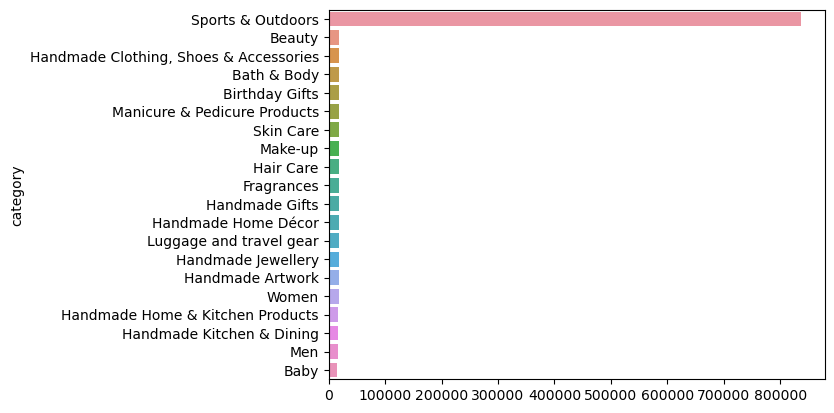

In [48]:
sns.barplot(y = freq_cat[:20].index, x = freq_cat[:20].values)

In [50]:
proportion_cat = df["category"].value_counts(normalize = True)

In [54]:
top_5 = proportion_cat[:5]

<Axes: ylabel='proportion'>

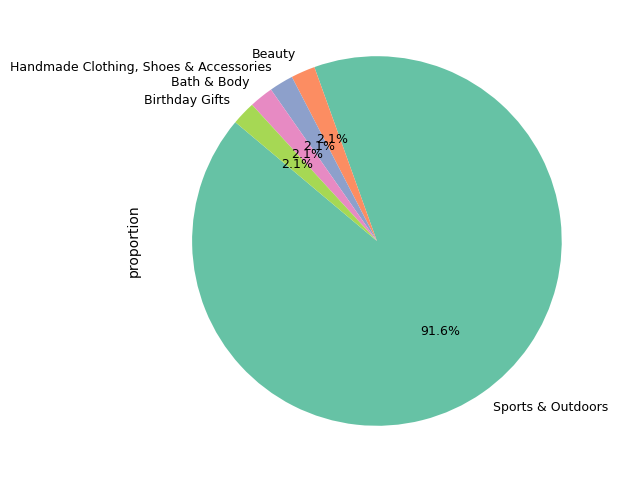

In [68]:
plt.figure(figsize=(6,6))
top_5.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"), textprops={'fontsize': 9})


### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

**Answer after data analysis**:

- The range of prices for different products is very high.
- The majority of products are sold in a range of 0-50€.

**1. Measures of Centrality**:

- Calculate the mean, median, and mode for the price of products.
- What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [15]:
centrality_tab = df.groupby("category")["price"].agg(mean="mean",
                                                           median="median", 
                                                           mode = lambda x: x.mode().iloc[0])
centrality_tab["mean"] = centrality_tab["mean"].round(2)
centrality_tab

,mean,median,mode
category,,,
3D Printers,1018.04,319.00,499.00
3D Printing & Scanning,99.91,36.86,313.99
Abrasive & Finishing Products,15.80,10.49,5.99
Action Cameras,135.42,60.77,16.99
Adapters,8.75,7.05,7.99
...,...,...,...
Wind Instruments,391.59,126.79,9.99
Window Treatments,20.67,17.99,18.99
Women,22.26,16.49,9.99


In [111]:
average_price_tot = round(df["price"].mean(), 2)
average_mode_tot = df["price"].mode()[0]

print(f"""Average price point of the products: {average_price_tot} €
Most common price point: {average_mode_tot} €""")

Average price point of the products: 89.24 €
Most common price point: 9.99 €


Overall, the most common price point (mode) is mostly lower than the average price of the products.

**2. Measures of Dispersion**:

- Determine the variance, standard deviation, range, and interquartile range for product price.
- How varied are the product prices? Are there any indicators of a significant spread in prices?

In [17]:
# Table of measures of dispersion for every category of products

dispersion_tab = df.groupby("category")["price"].agg(variance="var", standard_deviation="std", 
                                                     price_range = lambda x: x.max()-x.min(), 
                                                     IQR = lambda x: (x.quantile(0.75) - x.quantile(0.25)))

dispersion_tab["variance"] = dispersion_tab["variance"].round(2)
dispersion_tab["standard_deviation"] = dispersion_tab["standard_deviation"].round(2)
dispersion_tab["IQR"] = dispersion_tab["IQR"].round(2)

dispersion_tab

,variance,standard_deviation,price_range,IQR
category,,,,
3D Printers,3645043.41,1909.20,12993.01,707.95
3D Printing & Scanning,57498.79,239.79,5446.99,59.83
Abrasive & Finishing Products,289.76,17.02,147.99,10.49
Action Cameras,42577.16,206.34,2496.41,123.44
Adapters,39.15,6.26,65.19,4.60
...,...,...,...,...
Wind Instruments,662231.76,813.78,9659.10,463.80
Window Treatments,194.12,13.93,126.00,12.00
Women,461.02,21.47,257.46,15.00


In [108]:
# General measures of dispersion for the product prices

variance = round(df["price"].var(), 2)
std_dev = round(df["price"].std(), 2)
range_price = df["price"].max() - df["price"].min()
Q3 = df["price"].quantile(0.75)
Q1 = df["price"].quantile(0.25)
IQR = Q3 -Q1

print(f"""Variance: {variance}
Standard deviation: {std_dev}
Range: {range_price}
IQR: {IQR}""")

Variance: 119445.49
Standard deviation: 345.61
Range: 100000.0
IQR: 36.0


The **variance** is very high, as well as the standard deviation, given the mean values of the products.
For example, the mean price of 3D printers is approximately 1020€ with a variance of 3,645,043 and a standard deviation of almost 2000€, meaning that the data range of values is very high.

**3. Visualizations**:

- Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..

- Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

<Axes: xlabel='price', ylabel='Count'>

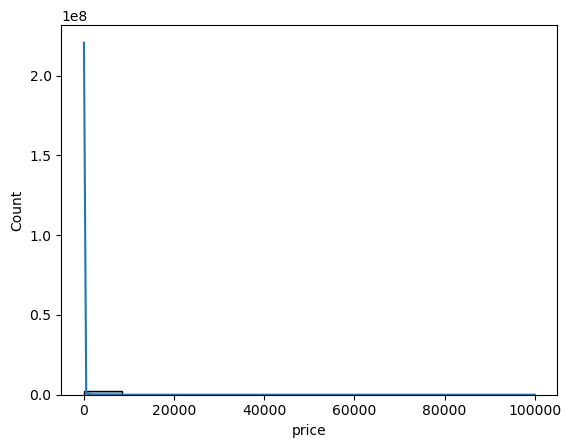

In [119]:
sns.histplot(df["price"], kde = True, bins=12)

The range of prices for different products is way too high to be able to visualize correctly the distribution of these data.
Moreover, the majority of products are sold in a range of 0-50€ (approximately).

A way to overcome this might be to categorize the products by their price ranges.

In [150]:
bins = [0, 50, 500, 10000, df["price"].max()]
bins.sort()
labels = ["Low", "Medium", "High", "Very high"]

df["price_category"] = pd.cut(df["price"], bins = bins, labels = labels, include_lowest=True)

df_very_low = df[df["price_category"] == "Low"]
df_medium = df[df["price_category"] == "Medium"]
df_high = df[df["price_category"] == "High"]
df_very_high = df[df["price_category"] == "Very high"]


In [151]:
df["price_category"].value_counts()

price_category
Low          1877785
Medium        478361
High           87338
Very high        167
Name: count, dtype: int64

<Axes: xlabel='price', ylabel='Count'>

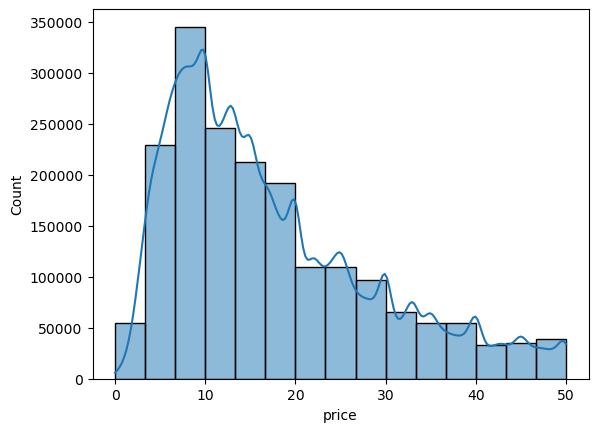

In [134]:
sns.histplot(df_low["price"], kde = True, bins=15)

<Axes: xlabel='price', ylabel='Count'>

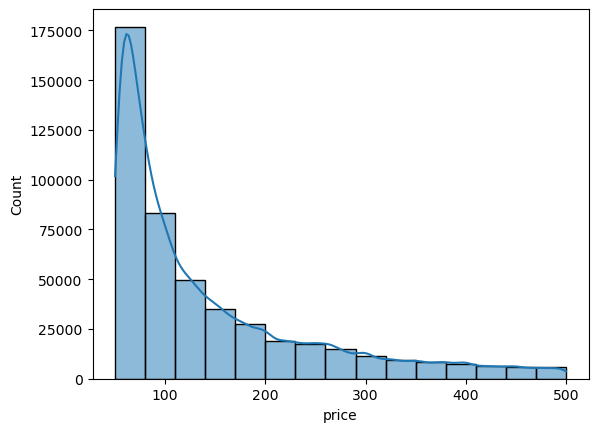

In [137]:
sns.histplot(df_medium["price"], kde = True, bins=15)

<Axes: xlabel='price', ylabel='Count'>

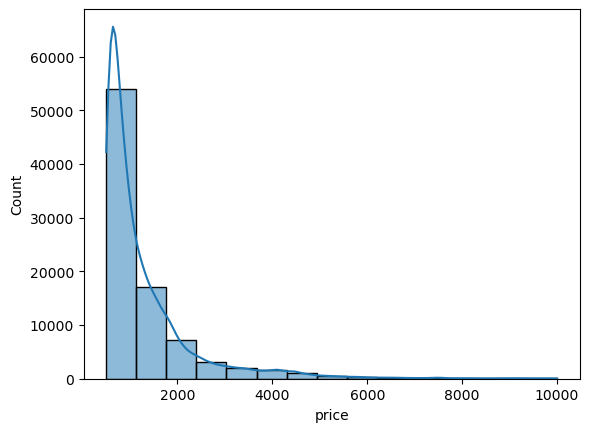

In [138]:
sns.histplot(df_high["price"], kde = True, bins=15)

<Axes: xlabel='price', ylabel='Count'>

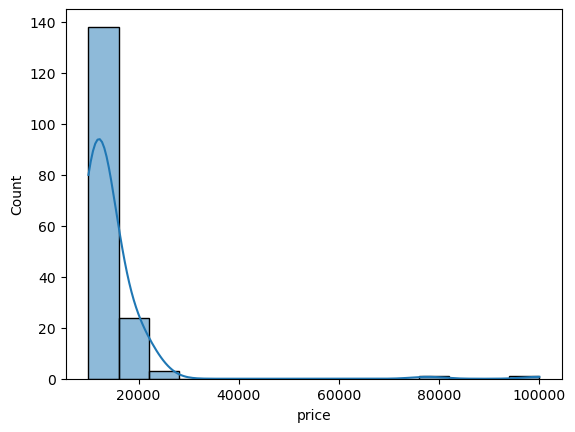

In [139]:
sns.histplot(df_very_high["price"], kde = True, bins=15)

<Axes: >

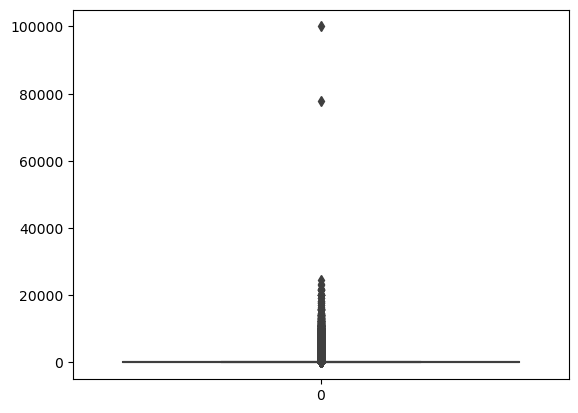

In [140]:
sns.boxplot(df["price"])

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

**Answer after data analysis**:

- Generally, customers rate products very low (general mean 2.15 stars) but the ratings highly depend on the product category.

- Unfortunately, the most common rating by customers is 0.

**1. Measures of Centrality**:

- Calculate the mean, median, and mode for the rating of products.
- How do customers generally rate products? Is there a common trend?

In [4]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [14]:
centrality_tab = df.groupby("category")["stars"].agg(mean="mean",
                                                           median="median", 
                                                           mode = lambda x: x.mode().iloc[0])
centrality_tab["mean"] = centrality_tab["mean"].round(2)
centrality_tab

,mean,median,mode
category,,,
3D Printers,2.64,3.9,0.0
3D Printing & Scanning,0.15,0.0,0.0
Abrasive & Finishing Products,4.13,4.5,4.5
Action Cameras,1.28,0.0,0.0
Adapters,4.14,4.4,4.4
...,...,...,...
Wind Instruments,2.03,0.0,0.0
Window Treatments,4.11,4.4,4.4
Women,4.17,4.3,4.4


In [19]:
mean_tot = round(df["stars"].mean(), 2)
median_tot = df["stars"].median()
mode_tot = df["stars"].mode()[0]

print(f"""General mean review: {mean_tot}
General median review: {median_tot}
General mode review: {mode_tot}""")

General mean review: 2.15
General median review: 0.0
General mode review: 0.0


**2. Measures of Dispersion**:

- Determine the variance, standard deviation, and interquartile range for product rating.
- Are the ratings consistent, or is there a wide variation in customer feedback?

In [20]:
# General measures of dispersion for the product rating

variance = round(df["stars"].var(), 2)
std_dev = round(df["stars"].std(), 2)
range_price = df["stars"].max() - df["stars"].min()
Q3 = df["stars"].quantile(0.75)
Q1 = df["stars"].quantile(0.25)
IQR = Q3 -Q1

print(f"""Variance: {variance}
Standard deviation: {std_dev}
Range: {range_price}
IQR: {IQR}""")

Variance: 4.82
Standard deviation: 2.19
Range: 5.0
IQR: 4.4


Considering that ratings can go from 0 to 5 stars, the variability of rating is quite high.

**3. Shape of the Distribution**:

- Calculate the skewness and kurtosis for the rating column.
- Are the ratings normally distributed, or do they lean towards higher or lower values?

**4. Visualizations**:

- Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

Skewness: 0.08
Kurtosis: -1.93


<Axes: xlabel='stars', ylabel='Count'>

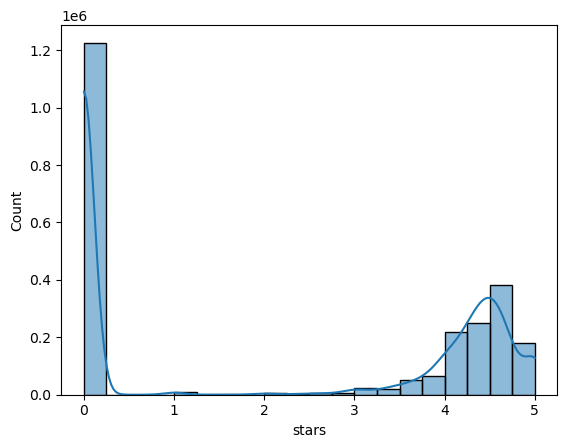

In [24]:
skewness = round(df["stars"].skew(), 2)
kurtosis = round(df["stars"].kurtosis(), 2)

print(f"""Skewness: {skewness}
Kurtosis: {kurtosis}""")

sns.histplot(df["stars"], kde = True, bins = 20)

The skewness value being close to 0 may indicate that the distribution is nearly symmetrical, even if it slightly tends towards the right. However, the negative kurtosis value indicates that the distribution has lighter tails and is flatter than a normal distribution.

Thus, the skewness value being close to 0 indicates an almost symmetrical distribution, this may not be the case due to the negative kurtosis value indicating lighter tails and flat distribution.

The most common rating is 0.